Q2)  A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
  Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.
 


### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
data = pd.read_csv("LABtat.csv")

In [4]:
data

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


## EDA

In [5]:
data.mean()

Laboratory 1    178.361583
Laboratory 2    178.902917
Laboratory 3    199.913250
Laboratory 4    163.682750
dtype: float64

In [6]:
# reshape the d dataframe suitable for statsmodels package 
data_melt = pd.melt(data.reset_index(), id_vars=['index'], value_vars=['Laboratory 1', 'Laboratory 2', 'Laboratory 3', 
                                                                   'Laboratory 4'])

In [7]:
data_melt

,index,variable,value
0,0,Laboratory 1,185.35
1,1,Laboratory 1,170.49
2,2,Laboratory 1,192.77
3,3,Laboratory 1,177.33
4,4,Laboratory 1,193.41
...,...,...,...
475,115,Laboratory 4,172.68
476,116,Laboratory 4,177.64
477,117,Laboratory 4,170.27
478,118,Laboratory 4,150.87


In [8]:
# replace column names
data_melt.columns = ['index', 'treatments', 'value']

In [9]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

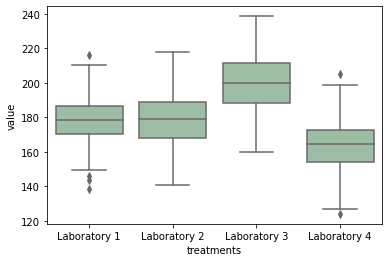

In [11]:
ax = sns.boxplot(x='treatments', y='value', data=data_melt, color='#99c2a2')
plt.show()


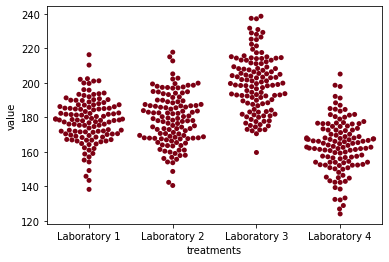

In [12]:
ax = sns.swarmplot(x="treatments", y="value", data=data_melt, color='#7d0013')
plt.show()

### Anova Implementation

In [13]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value

In [14]:
fvalue, pvalue = stats.f_oneway(data['Laboratory 1'], data['Laboratory 2'], data['Laboratory 3'], data['Laboratory 4'])

In [15]:
print(fvalue, pvalue)

118.70421654401437 2.1156708949992414e-57


Here p_value is < 0.05, so and therefore we conclude that there is difference in average TAT among the different laboratories at 5% significance level.
